## Exercise 3: Disk Galaxy in DM Halo
### With N-body interaction

In [32]:
%reload_ext autoreload
%autoreload 2

import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

import h5py

from main.make_ics import generate_ics, read_data
from main.nbody_nfw import NBodySimulation
import main.plot_utils as pu

Here we proceed analogously as in the previous exercise, but we are using the `NBodySimulation` class defined in `main/nbody_nfw.py`, instead of the `Simulation` class in `main/nfw.py` used before. As the name suggests,  `NBodySimulation` accounts for the gravitatinoal interaction of the N-bodies. Both classes are structured in a very similar way. The main difference resides in the `net_fields()` auxilliary function, which now contains a double loop for the computation of acceleration due to the body-to-body interaction (on top of the acceleration due to the homogeneous NFW density field).

Note that the loop is optimized and *parallelized* quite straightfowardly with the `numba` package. Thus, although in theory this computation should scale as $\mathcal{O}\left(N^2 \right)$, this is not the case as the implementation is parallel (although naively parallel). 

The other difference respect to the previous exercises is that we now use a *lepfrog* step for integration. On one hand, it is a symplectic integration scheme, and as such it conserves energy. On the other hand, it also is a good tradeoff between efficiency and accuracy, laying somewhat between euler and RK4, being more accurate than the former and faster than the latter (2 field computations per time-step needed instead of the 4 needed for RK4).

The final difference is the inclusion of a *softening length* to avoid collisions, i.e., close encounters where the interaction between two bodies is high enough such that the resoluting velocity update is not accurately resolved for a given time-step, which results in particles being jeeted away, an unphysical result (most of the time).

Having said that, we proceed as before for the simulation initialization and run. We will compute the orbits for a negligible softening length of $e=10^{-8} \, \text{kpc}$.

In the extra part of the exercise (next notebook), we will instead apply a reasonable softening length of $e=10^{-1} \, \text{kpc}$

## Simulations ($e=0$)

In [33]:
# Set the parameters (common to all simulations)

e = 1e-8  # practically 0 softening length
T = 2  # Time of integration
NT = 1000  # Number of time steps
num_snapshots = 500  # Number of snapshots to save (on per time-step)

In [34]:
sim_folder = 'results/nbody_10/'
path_data = 'data/disk10.txt'
POS, VEL, MASS = read_data(path_data)  # Read the data from the file

path_ics = f'{sim_folder}ics.hdf5'
generate_ics(path_ics, POS, VEL, MASS)  # Generate the .hdf5 file

path_output = sim_folder + 'output.hdf5'
Sim = NBodySimulation(path_ics, path_output)

dt = T/NT
Sim.set_time(T, dt, snapshots=num_snapshots)

Sim.run_simulation()
POS10, VEL10, MASS10, TIME = Sim.get_output()

99.90%
Elapsed time: 3.86 s


In [35]:
sim_folder = 'results/nbody_100/'
path_data = 'data/disk100.txt'
POS, VEL, MASS = read_data(path_data)  # Read the data from the file

path_ics = f'{sim_folder}ics.hdf5'
generate_ics(path_ics, POS, VEL, MASS)  # Generate the .hdf5 file

path_output = sim_folder + 'output.hdf5'
Sim = NBodySimulation(path_ics, path_output)

dt = T/NT
Sim.set_time(T, dt, snapshots=num_snapshots)

Sim.run_simulation()
POS100, VEL100, MASS100, TIME = Sim.get_output()

99.90%
Elapsed time: 3.75 s


In [36]:
sim_folder = 'results/nbody_1000/'
path_data = 'data/disk1000.txt'
POS, VEL, MASS = read_data(path_data)  # Read the data from the file

path_ics = f'{sim_folder}ics.hdf5'
generate_ics(path_ics, POS, VEL, MASS)  # Generate the .hdf5 file

path_output = sim_folder + 'output.hdf5'
Sim = NBodySimulation(path_ics, path_output)

dt = T/NT
Sim.set_time(T, dt, snapshots=num_snapshots)

Sim.run_simulation()
POS1000, VEL1000, MASS1000, TIME = Sim.get_output()

99.90%
Elapsed time: 5.09 s


We have computed the orbits for 10, 100 and 1000 bodies. First, we notice that the thing is pretty efficient (in the python realm at least). There is not that much difference between 10, 100 and 1000 bodies, even considering $N(N-1)/2$ interactions per time-step. And most of the runtime still is due to `.hdf5` writting overhead. Without snapshot saving, in my machine the code runs in 1.18 s for 1000 bodies. 


## Plotting the orbits ($e=0$)

We now clearly observe the effect of the interaction between bodies (in the XY and XZ planes). The heatmap, which can be interpreted as a kind of surface density field of the galaxy, depicts non circular orbits, and a more homogeneous structure with complex orbits. Although it is not evident at first sight, we have particles leaving the system due to close encounters with no softening length. This is more obviously seen in the next plot.

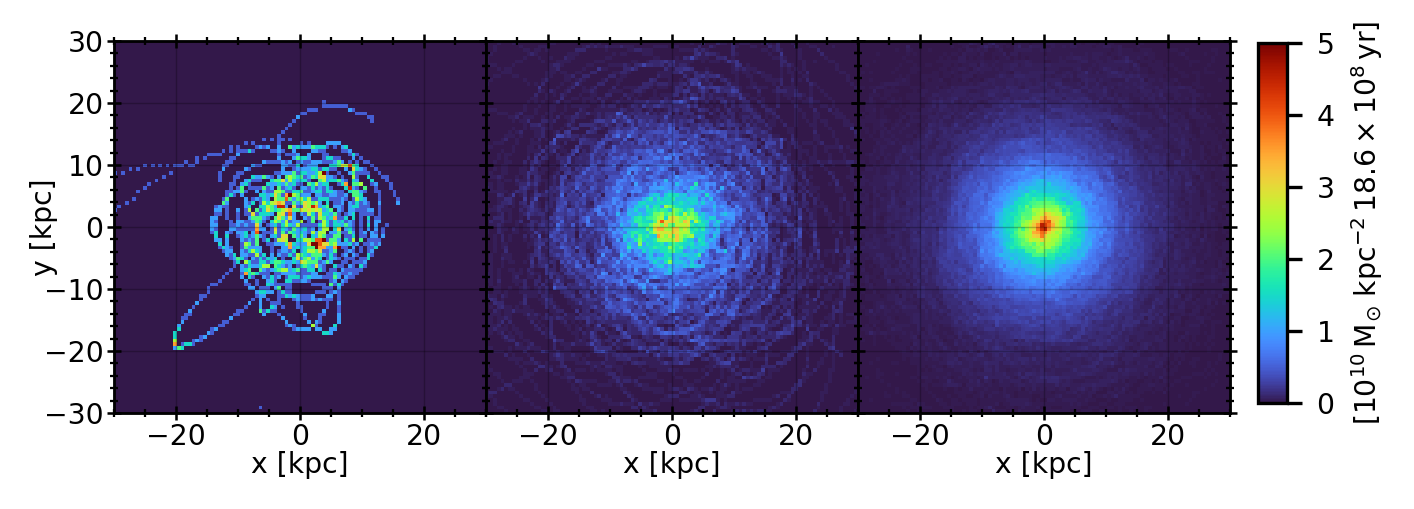

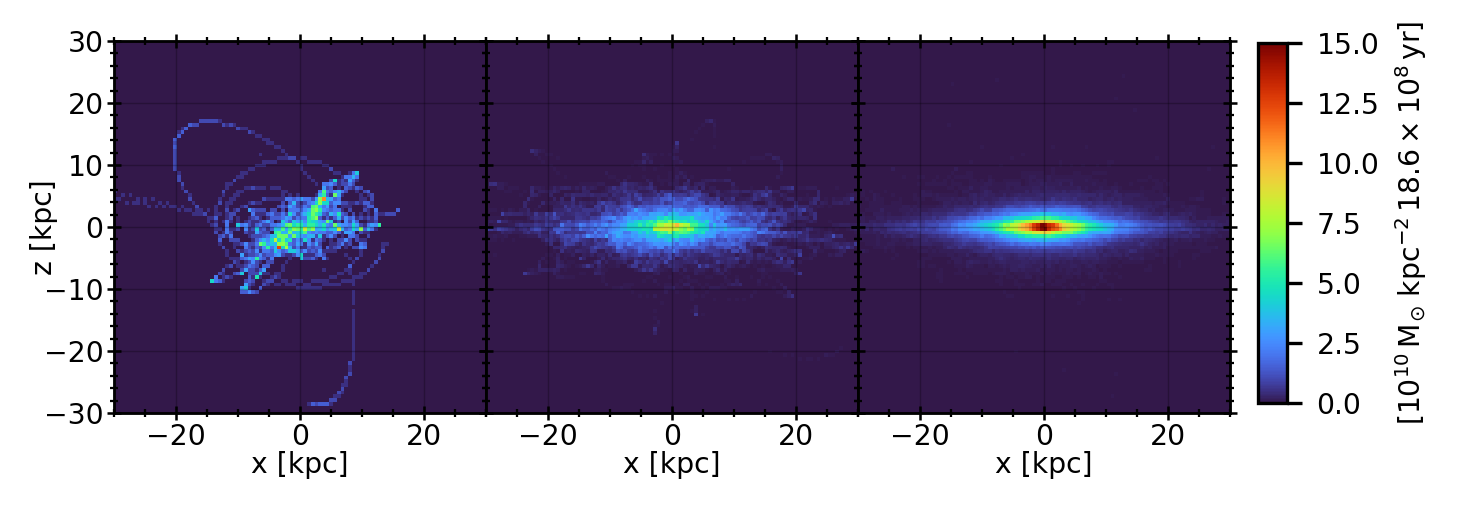

In [37]:
savepath = 'figures/ex3_galaxy_orbits_XY.jpg'
pu.plot_galaxy_orbits(POS10, MASS10, POS100, MASS100, POS1000, MASS1000, savepath,
                      projection='XY',
                      lim=30,
                      res=100, vmax=5)

savepath = 'figures/ex3_galaxy_orbits_XZ.jpg'
pu.plot_galaxy_orbits(POS10, MASS10, POS100, MASS100, POS1000, MASS1000, savepath,
                      projection='XZ',
                      lim=30,
                      res=100, vmax=15)

## Particles leaving the system ($e=0$)

Here we plot the time-series of the radial distance of particles in the galaxy, showcasing in red those that leave the system. The criteria used to classify those that leave the system is if the radial distance at any point is higher than a certain threshold, set here to 100 kpc. 

Particles Leaving the System: 83


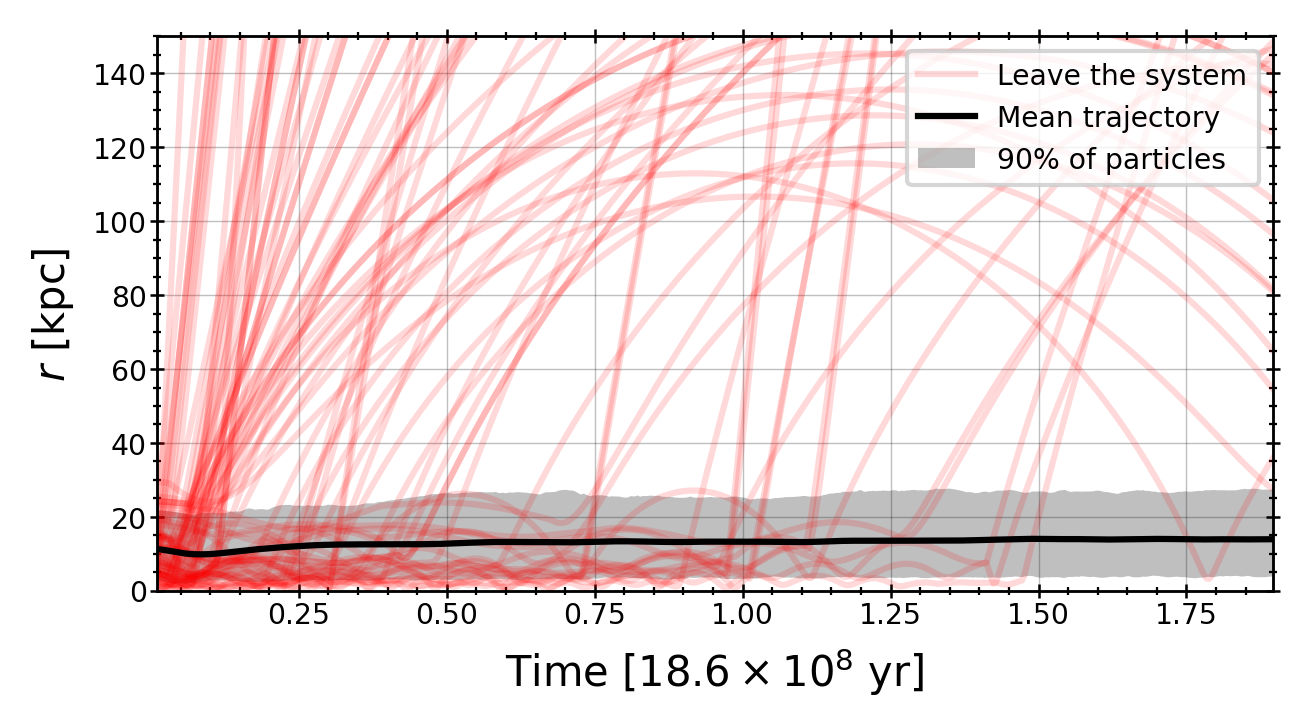

In [31]:
pu.plot_ts(POS1000, VEL1000, TIME, threshold=100)